In [1]:
from docx import Document

#use (pip install python-docx) for importing above module.

## Importing the list of string from docx file

In [2]:
doc = Document("PO_STRING.docx")

In [3]:
list_of_string = [p.text for p in doc.paragraphs if p.text]

In [4]:
list_of_string.pop(0)

'List of String'

In [5]:
list_of_string

['PO BOX',
 'P O BOX',
 'N/A',
 'POSTAL OFFICE BOX',
 'GENERAL DELIVERY',
 'POBOX',
 'POB',
 'PMB',
 'POBX',
 'POX',
 'POSTAL',
 'POSTOFFICEBOX',
 'POSTBOX',
 'POSTALBOX',
 'C/O',
 'A.A.',
 'APARTADOPOSTAL',
 'APTDO',
 'APTPOSTAL',
 'BOITEPOSTAL',
 'BOITO',
 'BOX',
 'CASAILA',
 'CASILLA',
 'CASILLADECORREO',
 'DELLA POSTA',
 'DELLAPOSTA',
 'P O.',
 'P O',
 'P O BOX',
 'P O.',
 'P. O',
 'P. O.',
 'P.  O.',
 'P.O. BOX',
 'P.O.BOX',
 'PO BOX',
 'POBOX',
 'POST BOKS',
 'POST BOX',
 'POST BUS',
 'POST OFFICE',
 'POST OFFICE BOX',
 'POSTBOKS',
 'POSTBOX',
 'POSTBUS',
 'POSTFACH',
 'POSTOFFICEBOX']

In [6]:
len(list_of_string)

48

## Word Cloud

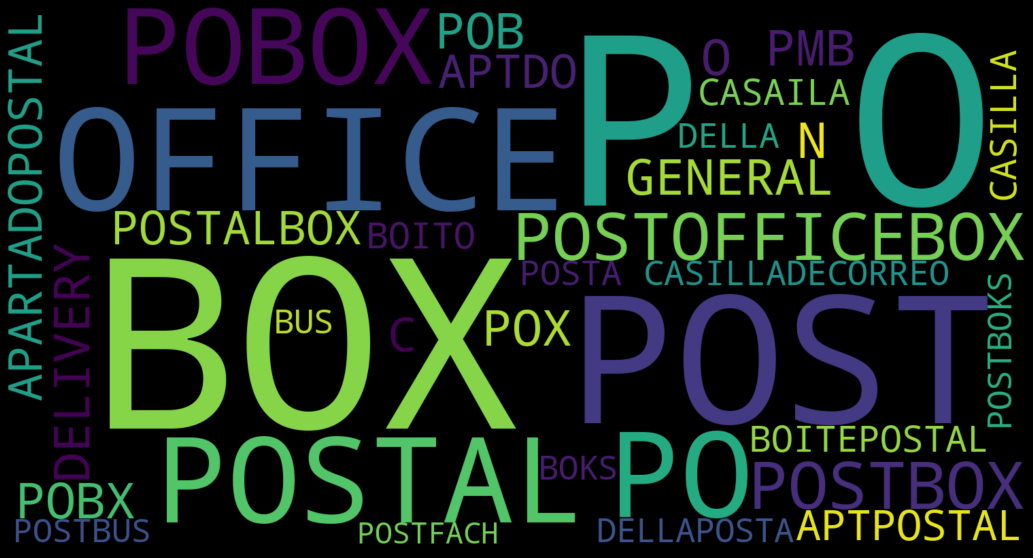

In [7]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

plt.figure( figsize=(20,10) , facecolor='k')
words_string = " ".join(list_of_string)
# Generate the word cloud from the post box string

clous_po_string = WordCloud(width=1500, height=800,background_color="black").generate(words_string)

# Create a figure of the generated cloud
plt.imshow(clous_po_string, interpolation='bilinear')  
plt.axis('off')
# Display the figure
plt.show()

## Levenshtein Distance

The Levenshtein distance is a text similarity measure that compares two words and returns a numeric value representing the distance between them. The distance reflects the total number of single-character edits required to transform one word into another. The more similar the two words are the less distance between them, and vice versa.

In [8]:
import numpy as np
import distance

#Assigning the list_of_strings to words
words = list_of_string

#change the list of words to numpy array
words = np.asarray(words) 

#Finding the levenstein simalarities beteen the strings
lev_similarity = -1*np.array([[distance.levenshtein(w1,w2) for w1 in words] for w2 in words])

In [9]:
words

array(['PO BOX', 'P O BOX', 'N/A', 'POSTAL OFFICE BOX',
       'GENERAL DELIVERY', 'POBOX', 'POB', 'PMB', 'POBX', 'POX', 'POSTAL',
       'POSTOFFICEBOX', 'POSTBOX', 'POSTALBOX', 'C/O', 'A.A.',
       'APARTADOPOSTAL', 'APTDO', 'APTPOSTAL', 'BOITEPOSTAL', 'BOITO',
       'BOX', 'CASAILA', 'CASILLA', 'CASILLADECORREO', 'DELLA POSTA',
       'DELLAPOSTA', 'P O.', 'P O', 'P O BOX', 'P O.', 'P. O', 'P. O.',
       'P.  O.', 'P.O. BOX', 'P.O.BOX', 'PO BOX', 'POBOX', 'POST BOKS',
       'POST BOX', 'POST BUS', 'POST OFFICE', 'POST OFFICE BOX',
       'POSTBOKS', 'POSTBOX', 'POSTBUS', 'POSTFACH', 'POSTOFFICEBOX'],
      dtype='<U17')

In [10]:
lev_similarity.shape

(48, 48)

In [11]:
lev_similarity

array([[  0,  -1,  -6, ...,  -4,  -6,  -8],
       [ -1,   0,  -7, ...,  -5,  -7,  -8],
       [ -6,  -7,   0, ...,  -7,  -7, -13],
       ...,
       [ -4,  -5,  -7, ...,   0,  -4,  -8],
       [ -6,  -7,  -7, ...,  -4,   0,  -7],
       [ -8,  -8, -13, ...,  -8,  -7,   0]])

## Affinity propagation (AP) 
It is a clustering algorithm based on the concept of "message passing" between data points.Unlike clustering algorithms such as k-means or k-medoids, affinity propagation does not require the number of clusters to be determined or estimated before running the algorithm.
https://en.wikipedia.org/wiki/Affinity_propagation

In [12]:
from sklearn.cluster import AffinityPropagation

In [13]:
affprop = AffinityPropagation(affinity="precomputed", damping=0.5,random_state=10)
affprop.fit(lev_similarity)
for cluster_id in np.unique(affprop.labels_):
    exemplar = words[affprop.cluster_centers_indices_[cluster_id]]
    cluster = np.unique(words[np.nonzero(affprop.labels_==cluster_id)])
    cluster_str = " , ".join(cluster)
    print(" --> %s:    %s" % (exemplar, cluster_str))

 --> PO BOX:    BOITO , P O BOX , P.  O. , P.O. BOX , P.O.BOX , PO BOX , POBOX , POBX
 --> GENERAL DELIVERY:    GENERAL DELIVERY
 --> POSTOFFICEBOX:    POST OFFICE , POST OFFICE BOX , POSTAL OFFICE BOX , POSTOFFICEBOX
 --> APTPOSTAL:    APARTADOPOSTAL , APTPOSTAL , BOITEPOSTAL , POSTAL
 --> CASILLA:    CASAILA , CASILLA
 --> CASILLADECORREO:    CASILLADECORREO
 --> DELLA POSTA:    DELLA POSTA , DELLAPOSTA
 --> P O:    A.A. , APTDO , BOX , C/O , N/A , P O , P O. , P. O , P. O. , PMB , POB , POX
 --> POSTBOX:    POST BOKS , POST BOX , POST BUS , POSTALBOX , POSTBOKS , POSTBOX , POSTBUS , POSTFACH


We sucessfully clustered the list of strings after finding the levenshtein distance between the string and using the Affinity propagation to cluster the list of strings into different group.

Above we have 9 clusters , with the most similar words in each clusters . 